# Working with Data

This notebook demos how to work with common datasets, specifically Iris, using `numpy` and `scikit-learn`.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from itertools import combinations
from sklearn.linear_model import LogisticRegression

%matplotlib notebook

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


<IPython.core.display.Javascript object>


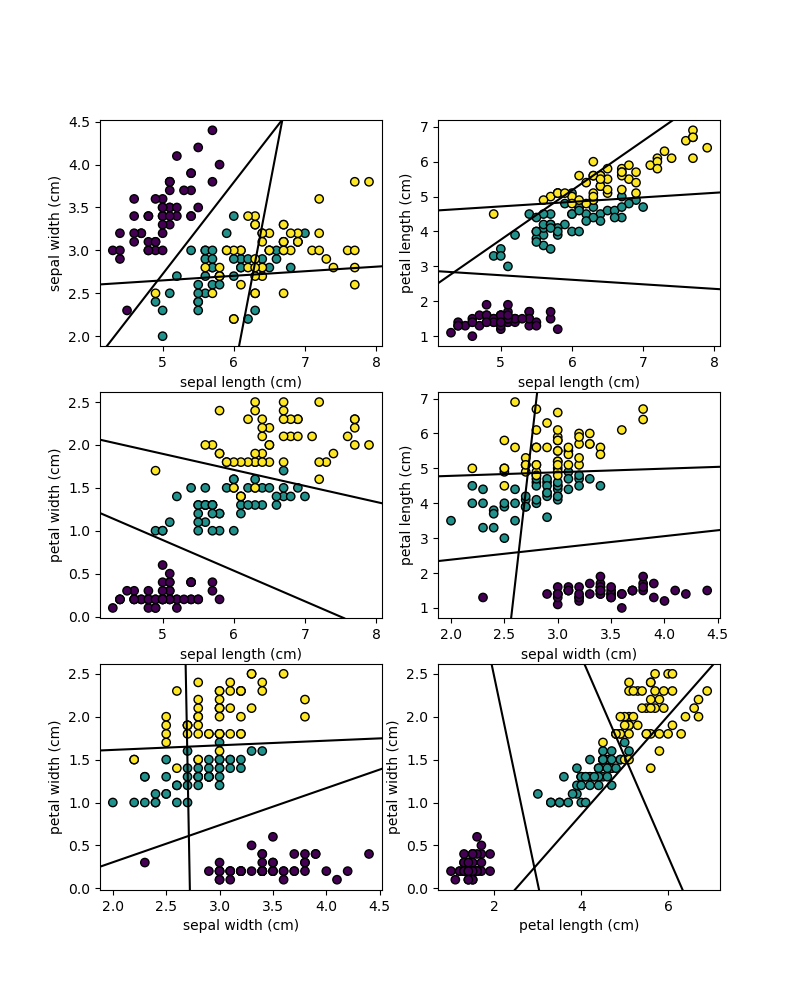

In [74]:
iris_dataset = datasets.load_iris()

x = iris_dataset.data
y = iris_dataset.target

# x contains the input data and y has the corresponding class labels.
# To see how many samples and features there are, check the shape of x
print(x.shape)

# This dataset also has a key for the feature names
feature_names = iris_dataset.feature_names
print(feature_names)

# Data analysis is an import step of machine learning, let's visualize all combinations
# of data as 2D plots
comb = list(combinations(list(range(4)), 2))
fig = plt.figure(figsize=[8, 10])
for i, v in enumerate(comb):
    clf = LogisticRegression(multi_class='ovr').fit(x[:, v], y)
    
    ax = fig.add_subplot(3, 2, i + 1)
    ax.scatter(x[:, v[0]], x[:, v[1]], c=y, edgecolor='k')
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    ax.set_xlabel(feature_names[v[0]])
    ax.set_ylabel(feature_names[v[1]])
    
    # Plot decision boundaries
    for k in range(3):
        b = clf.intercept_[k]
        weights = clf.coef_[k]
        bias = -b / weights[1]
        m = -weights[0] / weights[1]
        ax.axline([0, bias], slope=m, c=[0, 0, 0])
        
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([ymin, ymax])